<a href="https://colab.research.google.com/github/francji1/01DAS/blob/main/lectures/DAS_Time_Series_Intro_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Time series


## Where to go if I want to know ...

* Classical Time Series Analysis courses and books (based on R)
 * Forecasting: Principles and Practice: https://otexts.com/fpp2/
 * A Very Short Course on Time Series Analysis: https://bookdown.org/rdpeng/timeseriesbook/
 * Pennstate course STAT 510 Applied Time Series Analysis: https://online.stat.psu.edu/stat510/lesson/1
 * TS course from mlcollege and Dusan Fedorcak: https://github.com/mlcollege/time-series-analysis/tree/master/src

* Classical TS approach
 * statsmodel https://www.statsmodels.org/stable/tsa.html
 * Prophet https://facebook.github.io/prophet/docs/quick_start.html

* TS Feature Engeneering
 * tsfresh https://tsfresh.readthedocs.io/en/latest/text/introduction.html
 * machinelearningmastery https://machinelearningmastery.com/basic-feature-engineering-time-series-data-python/

* Machine Learnign approach
  * Machinelearningmastery https://machinelearningmastery.com/?s=Time+Series&post_type=post&submit=Search
  * DARTS https://unit8co.github.io/darts/examples/01-darts-intro.html (https://github.com/unit8co/darts/tree/master/examples) (https://unit8.com/resources/darts-time-series-made-easy-in-python/)
  * General ML: scikit-learn/keras/...
  *

* TS and AutoML Libraries
  * https://medium.com/data-science-at-microsoft/python-open-source-libraries-for-scaling-time-series-forecasting-solutions-3485c3bd8156
  * https://www.kaggle.com/andreshg/automl-libraries-comparison/notebook
  * https://medium.com/swlh/8-automl-libraries-to-automate-machine-learning-pipeline-3da0af08f636

  * https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
  * https://github.com/mljar/mljar-supervised#mljar


In [1]:
import sys
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from functools import reduce
import numpy as np
import matplotlib
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
import pytz


In [2]:
#from google.colab import drive
#from google.colab import files

#drive.mount('/content/drive/')
#uploaded = files.upload()

#path = '/content/drive/My Drive/01DAS/data/bike_share_hour.csv'
#data = pd.read_csv(path)
#ts = data['cnt']

## Dataset

https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset

```
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)
````

In [49]:
data = pd.read_csv("https://raw.githubusercontent.com/francji1/01DAS/refs/heads/main/data/bike_share_hour3.csv", sep=",")

ts = data['y']

# Convert the date and hour columns to a single datetime column
data['datetime'] = pd.to_datetime(data['date'], format='%Y-%m-%d') + pd.to_timedelta(data['hour'], unit='h')

data.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,datetime
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00


In [37]:
data.describe()

,instant,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [38]:

# Drop the original 'date' column and set 'datetime' as the index
data = data.drop(columns=['date'])
data = data.set_index('datetime')
# data_reset = data.reset_index()


In [10]:
data.head()

,instant,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01 03:00:00,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01 04:00:00,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


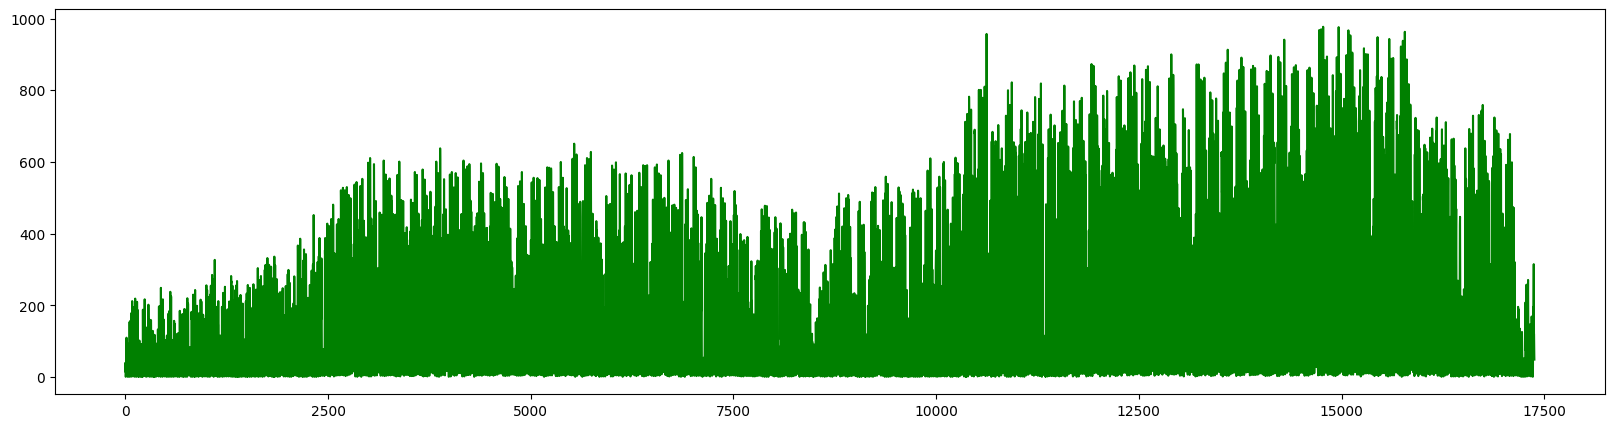

In [11]:
plt.figure(figsize=(20,5))
plt.plot(ts, 'g-')
plt.show()

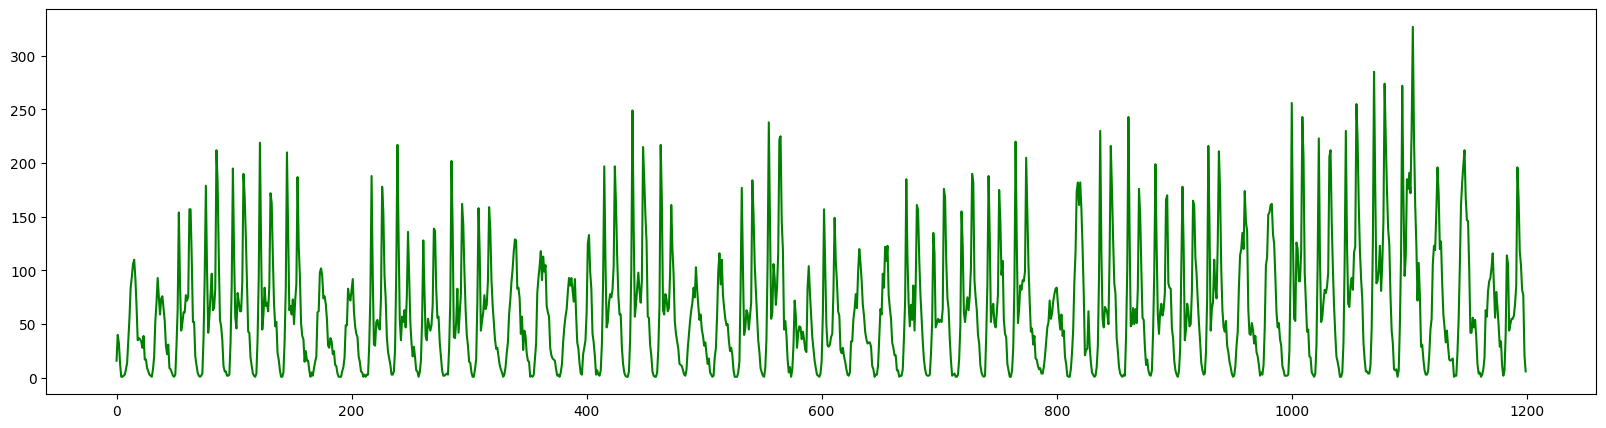

In [12]:
plt.figure(figsize=(20,5))
plt.plot(ts[0:1200], 'g-')
plt.show()

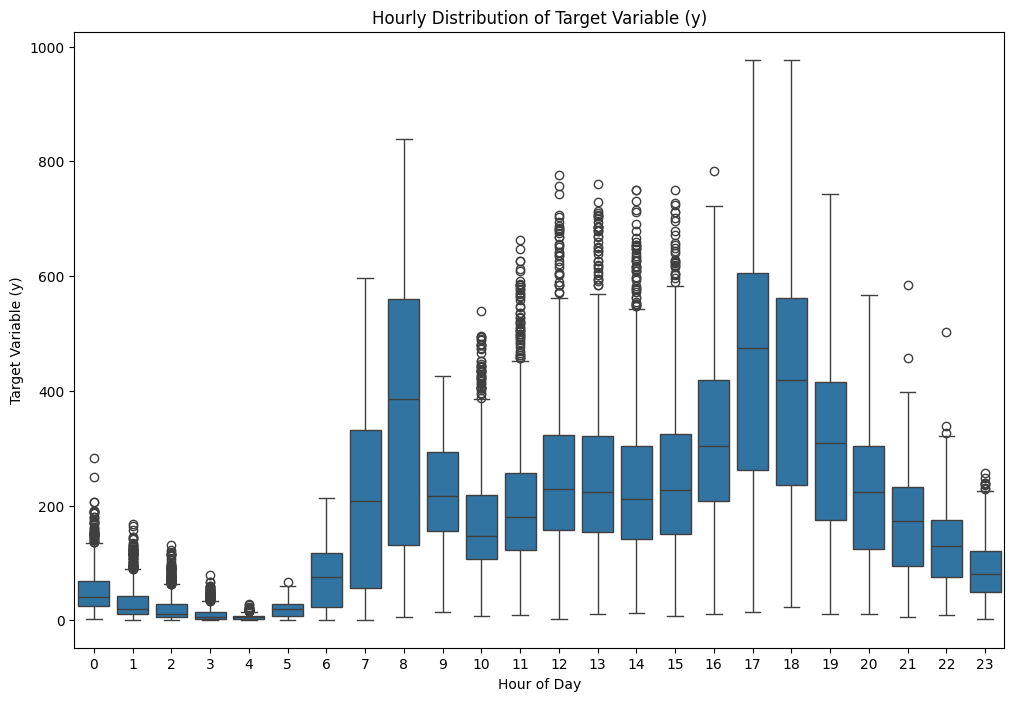

In [13]:
# Boxplot of the target variable ('y') by hour
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='hour', y='y', data=data, ax=ax)
ax.set_title('Hourly Distribution of Target Variable (y)')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Target Variable (y)')
plt.show()


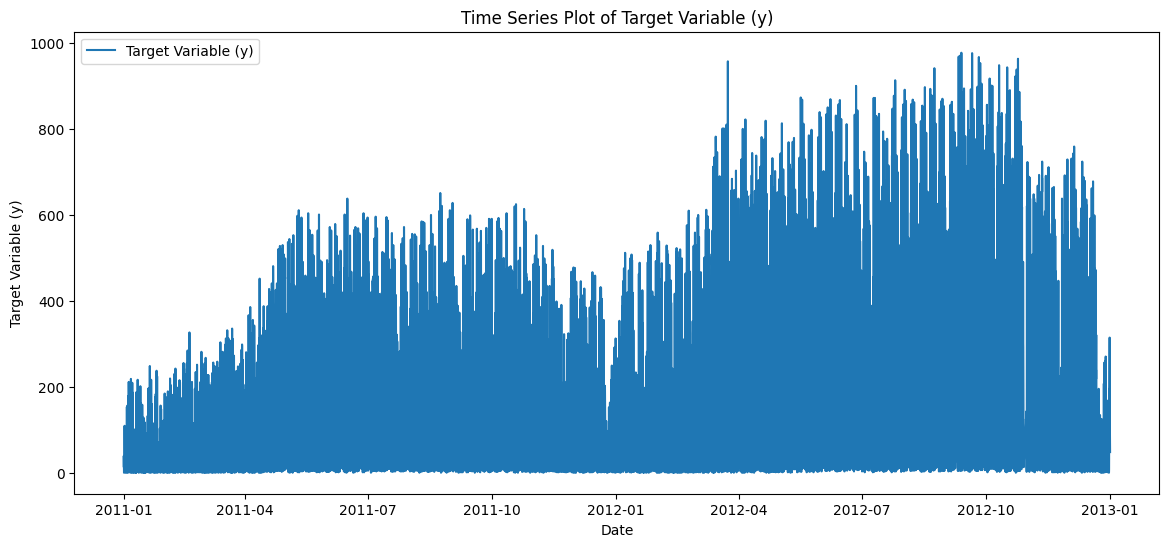

In [14]:
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['y'], label='Target Variable (y)')
plt.title('Time Series Plot of Target Variable (y)')
plt.xlabel('Date')
plt.ylabel('Target Variable (y)')
plt.legend()
plt.show()

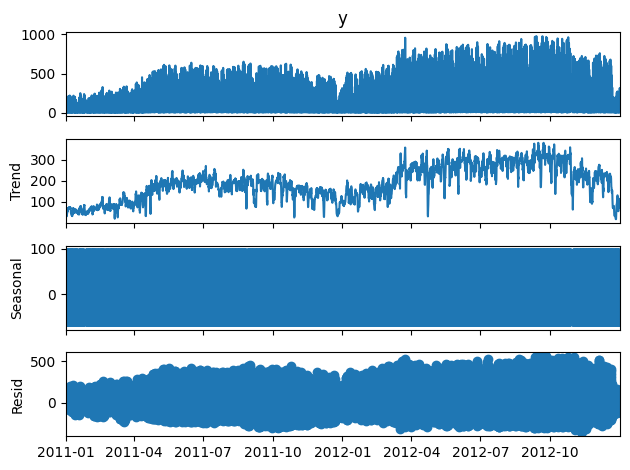

In [15]:
# Seasonal decomposition assuming daily frequency
decomposition = seasonal_decompose(data['y'], model='additive', period=24)
decomposition.plot()
plt.show()


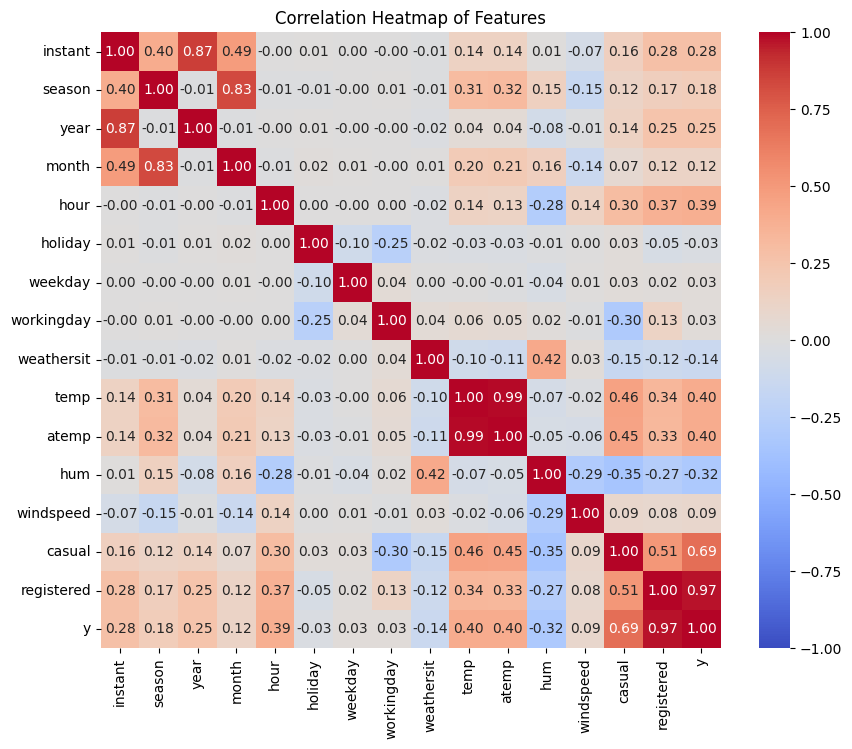

In [16]:
# Round the correlation values to 2 decimal points for display in the heatmap
corr_rounded = data.corr().round(2)

# Create the heatmap with rounded values
plt.figure(figsize=(10, 8))
sns.heatmap(corr_rounded, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

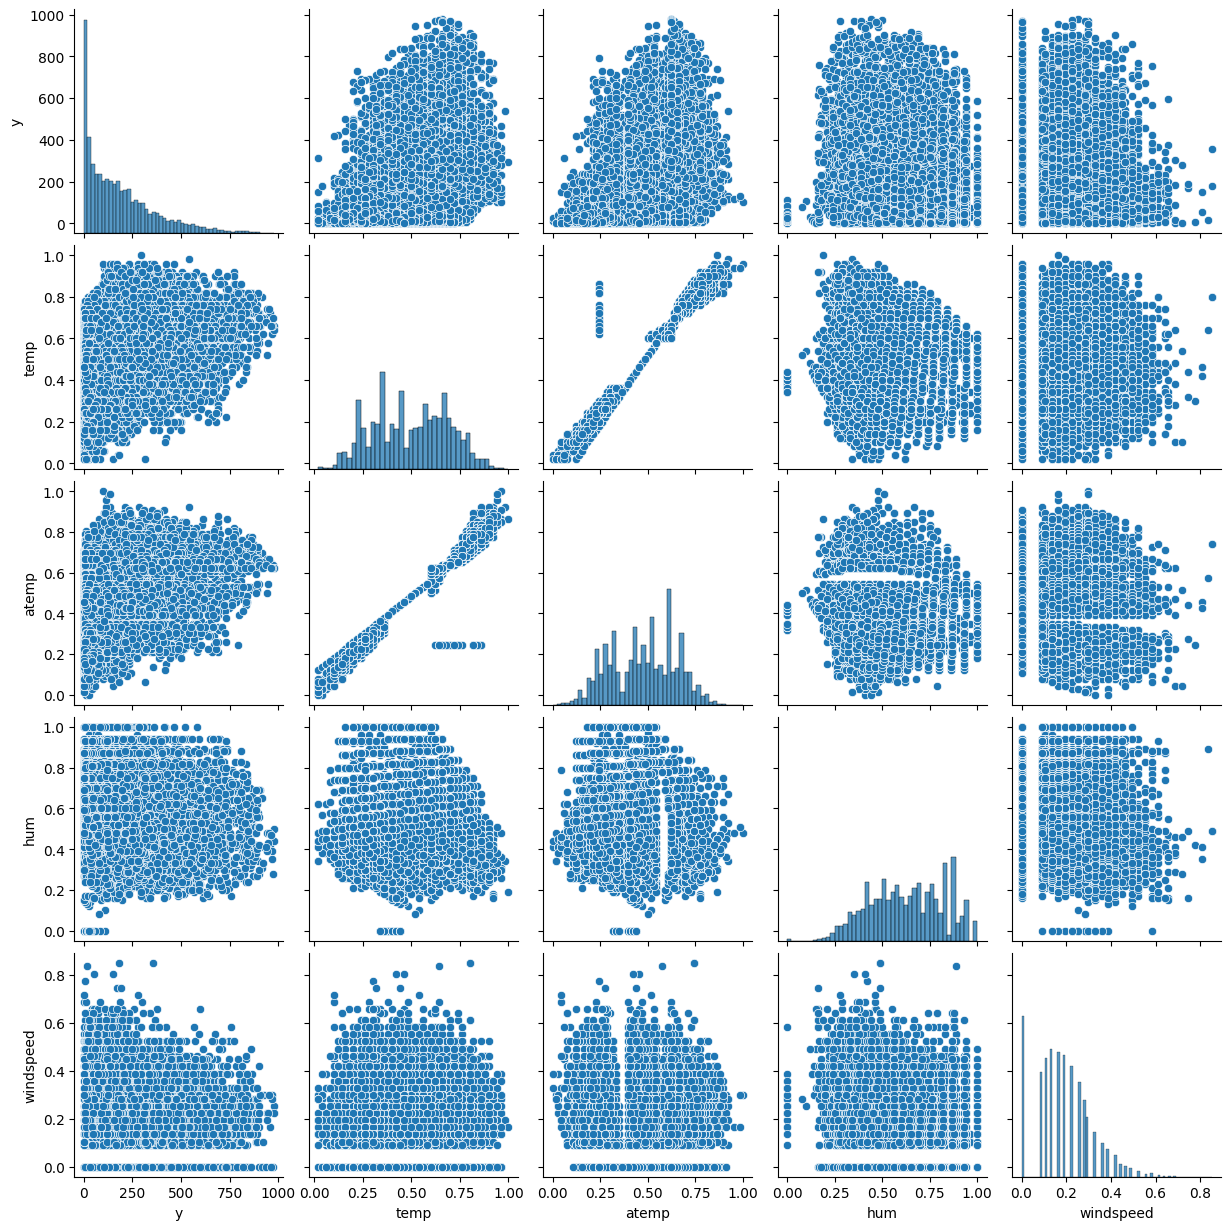

In [17]:
# Pairplot to see interactions between key variables
sns.pairplot(data[['y', 'temp', 'atemp', 'hum', 'windspeed']])
plt.show()




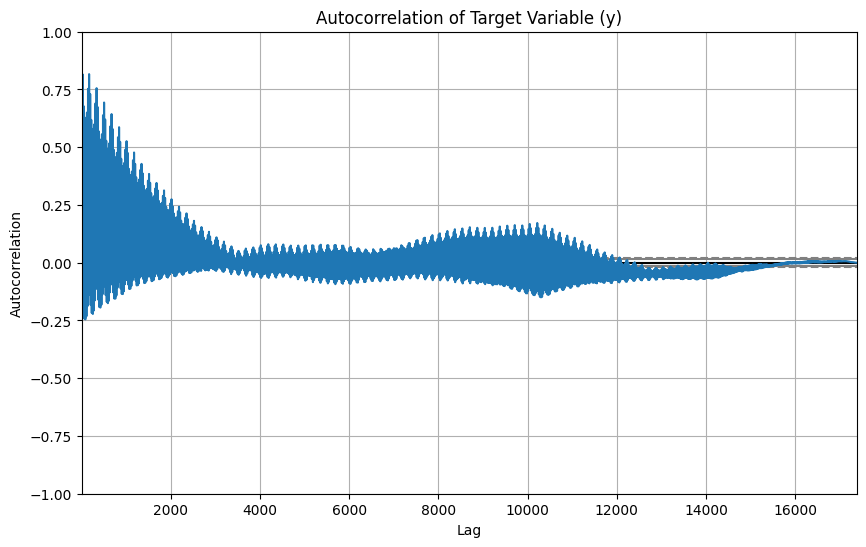

In [18]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(data['y'])
plt.title('Autocorrelation of Target Variable (y)')
plt.show()


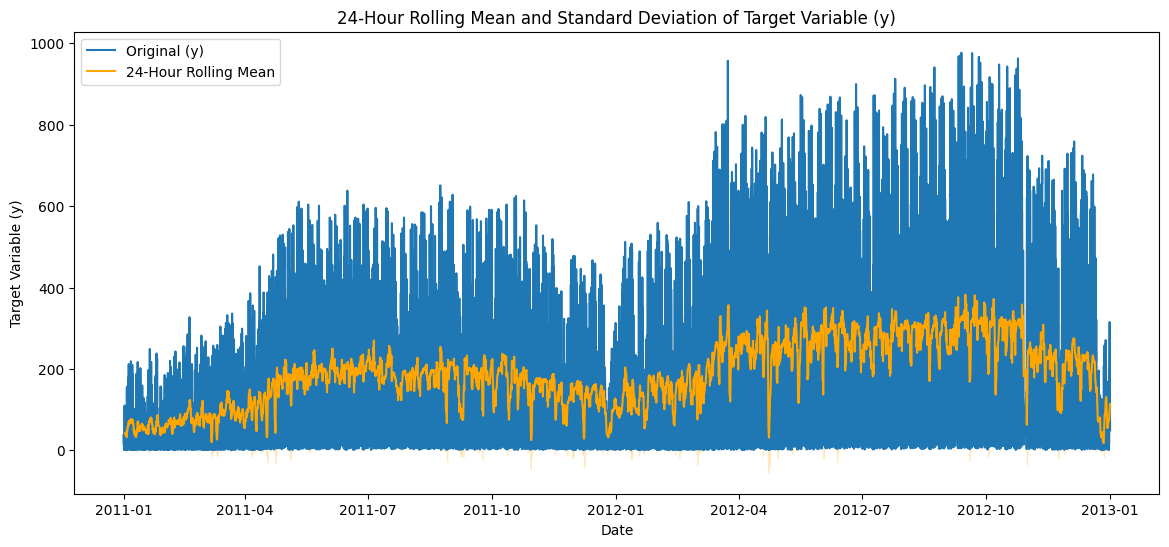

In [19]:
# Moving average and rolling standard deviation
data['y_rolling_mean'] = data['y'].rolling(window=24).mean()  # Daily rolling mean
data['y_rolling_std'] = data['y'].rolling(window=24).std()    # Daily rolling std
data['y_ema_12'] = data['y'].ewm(span=12, adjust=False).mean()  # 24-hour EMA for comparison
data['y_ema_24'] = data['y'].ewm(span=24, adjust=False).mean()  # 24-hour EMA for comparison


plt.figure(figsize=(14, 6))
plt.plot(data.index, data['y'], label='Original (y)')
plt.plot(data.index, data['y_rolling_mean'], color='orange', label='24-Hour Rolling Mean')
plt.fill_between(data.index, data['y_rolling_mean'] - data['y_rolling_std'],
                 data['y_rolling_mean'] + data['y_rolling_std'], color='orange', alpha=0.2)
plt.title('24-Hour Rolling Mean and Standard Deviation of Target Variable (y)')
plt.xlabel('Date')
plt.ylabel('Target Variable (y)')
plt.legend()
plt.show()


In [21]:
# Define the number of points to display
n = 600
subset_data = data[['y', 'y_rolling_mean', 'y_ema_12','y_ema_24']].dropna().iloc[:n]


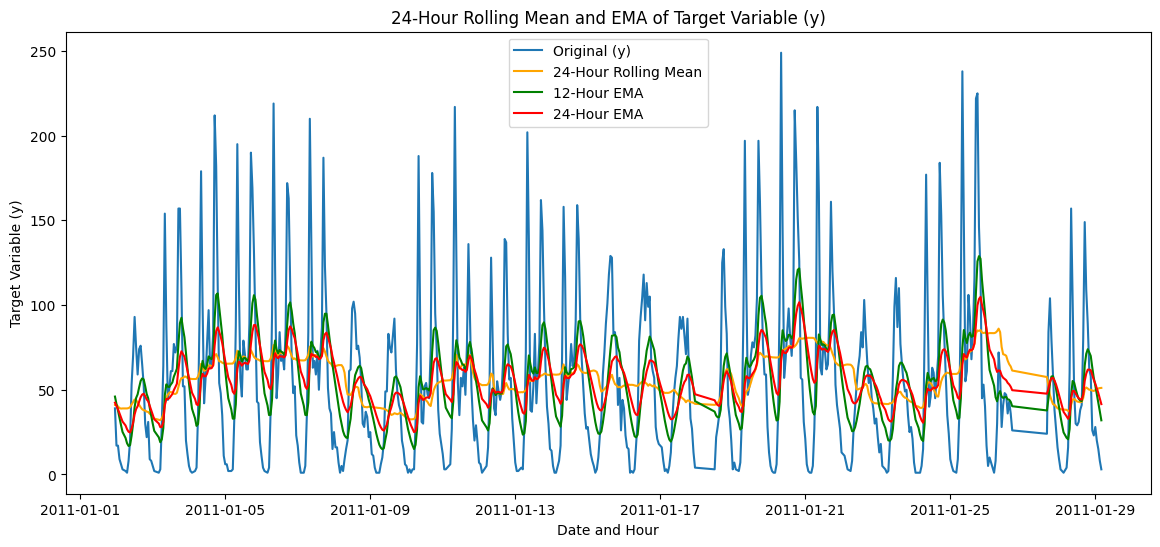

In [22]:

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(subset_data.index, subset_data['y'], linestyle='-', label='Original (y)')
plt.plot(subset_data.index, subset_data['y_rolling_mean'], linestyle='-', color='orange', label='24-Hour Rolling Mean')
plt.plot(subset_data.index, subset_data['y_ema_12'], linestyle='-', color='green', label='12-Hour EMA')
plt.plot(subset_data.index, subset_data['y_ema_24'], linestyle='-', color='red', label='24-Hour EMA')

plt.title('24-Hour Rolling Mean and EMA of Target Variable (y)')
plt.xlabel('Date and Hour')
plt.ylabel('Target Variable (y)')
plt.legend()
plt.show()



In [23]:
#!pip install darts


In [82]:
data = pd.read_csv("https://raw.githubusercontent.com/francji1/01DAS/refs/heads/main/data/bike_share_hour3.csv", sep=",")
ts = data['y']
# Convert the date and hour columns to a single datetime column
data['datetime'] = pd.to_datetime(data['date'], format='%Y-%m-%d') + pd.to_timedelta(data['hour'], unit='h')

data.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,datetime
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00


In [83]:
import pandas as pd
import pytz

# Assuming 'data' is your DataFrame with a datetime index or a 'datetime' column
# If 'datetime' is a column, convert it to a datetime index
if 'datetime' in data.columns:
    data['datetime'] = pd.to_datetime(data['datetime'])
    data.set_index('datetime', inplace=True)

# Check if the datetime index is timezone-aware
if data.index.tz is None:
    print("Datetime index is timezone-naive (no timezone information).")
else:
    print(f"Datetime index is timezone-aware: {data.index.tz}")

# Check if the timezone is UTC
if data.index.tz == pytz.utc:
    print("Datetime index is in UTC.")
else:
    print("Datetime index is not in UTC or is localized to a different timezone.")


Datetime index is timezone-naive (no timezone information).
Datetime index is not in UTC or is localized to a different timezone.


In [84]:
print(data[['y']].loc['2011-10-30'])


                       y
datetime                
2011-10-30 00:00:00   54
2011-10-30 01:00:00   43
2011-10-30 02:00:00   50
2011-10-30 03:00:00   33
2011-10-30 04:00:00   11
2011-10-30 05:00:00    4
2011-10-30 06:00:00   10
2011-10-30 07:00:00   22
2011-10-30 08:00:00   80
2011-10-30 09:00:00  147
2011-10-30 10:00:00  178
2011-10-30 11:00:00  240
2011-10-30 12:00:00  314
2011-10-30 13:00:00  345
2011-10-30 14:00:00  300
2011-10-30 15:00:00  290
2011-10-30 16:00:00  320
2011-10-30 17:00:00  245
2011-10-30 18:00:00  213
2011-10-30 19:00:00  153
2011-10-30 20:00:00   92
2011-10-30 21:00:00   79
2011-10-30 22:00:00   71
2011-10-30 23:00:00   37


In [105]:
if 'datetime' in data.columns:
    data['datetime'] = pd.to_datetime(data['datetime'])
    data.set_index('datetime', inplace=True)

data['datetime_utc'] = data.index

if data['datetime_utc'].dt.tz is None:
    data['datetime_utc'] = data['datetime_utc'].dt.tz_localize('UTC', ambiguous='NaT', nonexistent='shift_forward')
else:
    data['datetime_utc'] = data['datetime_utc'].dt.tz_convert('UTC')

data.head()



,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,datetime_utc
time,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0,2011-01-01 00:00:00+00:00
2011-01-01 01:00:00,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0,2011-01-01 01:00:00+00:00
2011-01-01 02:00:00,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0,2011-01-01 02:00:00+00:00
2011-01-01 03:00:00,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0,2011-01-01 03:00:00+00:00
2011-01-01 04:00:00,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0,2011-01-01 04:00:00+00:00


In [103]:
#  Generate a complete hourly datetime index over the data's time range
full_index = pd.date_range(start=data.index.min(), end=data.index.max(), freq='H', tz=data.index.tz)

# Identify missing timestamps
missing_timestamps = full_index.difference(data.index)

# Output the result
if missing_timestamps.empty:
    print("No missing hours detected.")
else:
    print("Missing hours detected:", missing_timestamps)

No missing hours detected.


<ipython-input-103-ab3ffea6a161>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_index = pd.date_range(start=data.index.min(), end=data.index.max(), freq='H', tz=data.index.tz)


In [87]:
# Reindex the data to include all hourly timestamps, filling missing hours
data = data.reindex(full_index)

# Fill missing timestamps
data = data.fillna(method='ffill').fillna(method='bfill')

# Display the resulting DataFrame
(data.head(10))


<ipython-input-87-fbb335bf5b1f>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')


,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,datetime_utc
2011-01-01 00:00:00,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0,2011-01-01 00:00:00+00:00
2011-01-01 01:00:00,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0,2011-01-01 01:00:00+00:00
2011-01-01 02:00:00,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0,2011-01-01 02:00:00+00:00
2011-01-01 03:00:00,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0,2011-01-01 03:00:00+00:00
2011-01-01 04:00:00,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0,2011-01-01 04:00:00+00:00
2011-01-01 05:00:00,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0,2011-01-01 05:00:00+00:00
2011-01-01 06:00:00,7.0,2011-01-01,1.0,0.0,1.0,6.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,2.0,0.0,2.0,2011-01-01 06:00:00+00:00
2011-01-01 07:00:00,8.0,2011-01-01,1.0,0.0,1.0,7.0,0.0,6.0,0.0,1.0,0.20,0.2576,0.86,0.0000,1.0,2.0,3.0,2011-01-01 07:00:00+00:00
2011-01-01 08:00:00,9.0,2011-01-01,1.0,0.0,1.0,8.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,1.0,7.0,8.0,2011-01-01 08:00:00+00:00
2011-01-01 09:00:00,10.0,2011-01-01,1.0,0.0,1.0,9.0,0.0,6.0,0.0,1.0,0.32,0.3485,0.76,0.0000,8.0,6.0,14.0,2011-01-01 09:00:00+00:00


In [104]:
# Identify missing timestamps
missing_timestamps = full_index.difference(data.index)

# Output the result
if missing_timestamps.empty:
    print("No missing hours detected.")
else:
    print("Missing hours detected:", missing_timestamps)

No missing hours detected.


In [91]:
data.index.hour.max()

23

In [131]:
# Drop unnecessary columns from the original DataFrame
df = data.drop(columns=['date','season','datetime_utc','year','instant', 'temp', 'casual', 'registered'])

# Define columns to create lags for and the lag hours
columns_to_lag = ['y', 'weathersit', 'atemp']
lags = [1, 2, 3, 4, 24, 168]

# Generate lagged features
for column in columns_to_lag:
    for lag in lags:
        df[f"{column}_{lag}"] = df[column].shift(lag)

# Drop rows with NaN values due to shifting, while retaining the datetime index
df = df.dropna()

#df = df.reset_index()
#df.set_index('time', inplace=True)

# Display the resulting DataFrame
df[['y','y_1','y_2']]


,y,y_1,y_2
time,,,
2011-01-08 00:00:00,25.0,15.0,36.0
2011-01-08 01:00:00,16.0,25.0,15.0
2011-01-08 02:00:00,16.0,16.0,25.0
2011-01-08 03:00:00,7.0,16.0,16.0
2011-01-08 04:00:00,1.0,7.0,16.0
...,...,...,...
2012-12-31 19:00:00,119.0,122.0,164.0
2012-12-31 20:00:00,89.0,119.0,122.0
2012-12-31 21:00:00,90.0,89.0,119.0


In [118]:
df.dtypes


,0
season,float64
month,float64
hour,float64
holiday,float64
weekday,float64
workingday,float64
weathersit,float64
atemp,float64
hum,float64
windspeed,float64


In [74]:
!pip install xgboost


In [126]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'df' is the DataFrame with lagged features and 'y' as the target column
# Set up target columns for 1-hour, 2-hour, and 3-hour ahead predictions
df['y_1h_ahead'] = df['y'].shift(-1)
df['y_2h_ahead'] = df['y'].shift(-2)
df['y_3h_ahead'] = df['y'].shift(-3)

# Drop rows with NaN values introduced by shifting
df = df.dropna()

# Define lags to include for each model
all_lags = [col for col in df.columns if 'y_' in col and col != 'y']
lags_for_1h = all_lags
lags_for_2h = [col for col in all_lags if col != 'y_1']
lags_for_3h = [col for col in all_lags if col not in ['y_1', 'y_2']]

# Define a TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Initialize dictionaries to store models and performance metrics
models = {}
metrics = {}

# Training models for each horizon
for horizon, target, lags in zip(
    [1, 2, 3],
    ['y_1h_ahead', 'y_2h_ahead', 'y_3h_ahead'],
    [lags_for_1h, lags_for_2h, lags_for_3h]
):
    print(f"\nTraining model for {horizon}-hour ahead prediction")

    # Extract features (lags) and target for this horizon
    X = df[lags]
    y = df[target]

    # Initialize XGBoost regressor
    model = XGBRegressor()

    # Perform time series cross-validation
    mae_scores, rmse_scores = [], []
    for train_index, val_index in tscv.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Fit model and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        # Evaluate performance
        mae_scores.append(mean_absolute_error(y_val, y_pred))
        rmse_scores.append(mean_squared_error(y_val, y_pred, squared=False))

    # Store the trained model and average performance metrics
    models[f'{horizon}_hour_model'] = model
    metrics[f'{horizon}_hour'] = {
        'MAE': sum(mae_scores) / len(mae_scores),
        'RMSE': sum(rmse_scores) / len(rmse_scores)
    }

# Display the performance metrics
for horizon in metrics:
    print(f"\n{horizon}-hour ahead model performance:")
    print(f"Mean Absolute Error (MAE): {metrics[horizon]['MAE']}")
    print(f"Root Mean Squared Error (RMSE): {metrics[horizon]['RMSE']}")



Training model for 1-hour ahead prediction


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo


Training model for 2-hour ahead prediction


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo


Training model for 3-hour ahead prediction


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo


1_hour-hour ahead model performance:
Mean Absolute Error (MAE): 2.828027851173915
Root Mean Squared Error (RMSE): 10.157333899110286

2_hour-hour ahead model performance:
Mean Absolute Error (MAE): 2.8672943785153526
Root Mean Squared Error (RMSE): 10.471063233740637

3_hour-hour ahead model performance:
Mean Absolute Error (MAE): 2.8687121588372606
Root Mean Squared Error (RMSE): 10.53672642757467


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [129]:
df.dtypes

,0
season,float64
month,float64
hour,float64
holiday,float64
weekday,float64
workingday,float64
weathersit,float64
atemp,float64
hum,float64
windspeed,float64


In [132]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
import numpy as np

# Function to train and evaluate model for different horizons
def train_evaluate_model(df, horizon, lags_to_drop):
    # Drop specified lags for the given horizon
    features = df.drop(columns=['y'] + lags_to_drop).columns
    X = df[features]
    y = df['y']

    # Initialize model and time series split
    model = XGBRegressor()
    tscv = TimeSeriesSplit(n_splits=5)
    predictions = []
    actuals = []

    # Perform time series split
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions for the test set and store results
        y_pred = model.predict(X_test)
        predictions.extend(y_pred)
        actuals.extend(y_test)

    # Calculate evaluation metric
    mae = mean_absolute_error(actuals, predictions)
    print(f"Mean Absolute Error for {horizon}-hour prediction: {mae}")

    return model, predictions

# Define the lags to drop for each prediction horizon
lag_features_1_hour = []  # Use all lags for 1-hour prediction
lag_features_2_hour = [col for col in df.columns if '_1' in col]  # Drop 1-hour lags
lag_features_3_hour = [col for col in df.columns if '_1' in col or '_2' in col]  # Drop 1-hour and 2-hour lags

# Train models for each prediction horizon
print("Training 1-hour ahead model:")
model_1_hour, predictions_1_hour = train_evaluate_model(df, 1, lag_features_1_hour)

print("\nTraining 2-hour ahead model:")
model_2_hour, predictions_2_hour = train_evaluate_model(df, 2, lag_features_2_hour)

print("\nTraining 3-hour ahead model:")
model_3_hour, predictions_3_hour = train_evaluate_model(df, 3, lag_features_3_hour)


Training 1-hour ahead model:
Mean Absolute Error for 1-hour prediction: 35.30533223387461

Training 2-hour ahead model:
Mean Absolute Error for 2-hour prediction: 44.88635115787703

Training 3-hour ahead model:
Mean Absolute Error for 3-hour prediction: 58.18866232959895


Training 1-hour ahead model with XGBoost:
1-hour prediction - MAE: 22.042597258349673, R²: 0.9578431051460574

Training 2-hour ahead model with XGBoost:
2-hour prediction - MAE: 33.646223405916764, R²: 0.8981376705417288

Training 3-hour ahead model with XGBoost:
3-hour prediction - MAE: 45.315317785284584, R²: 0.8323537974912533


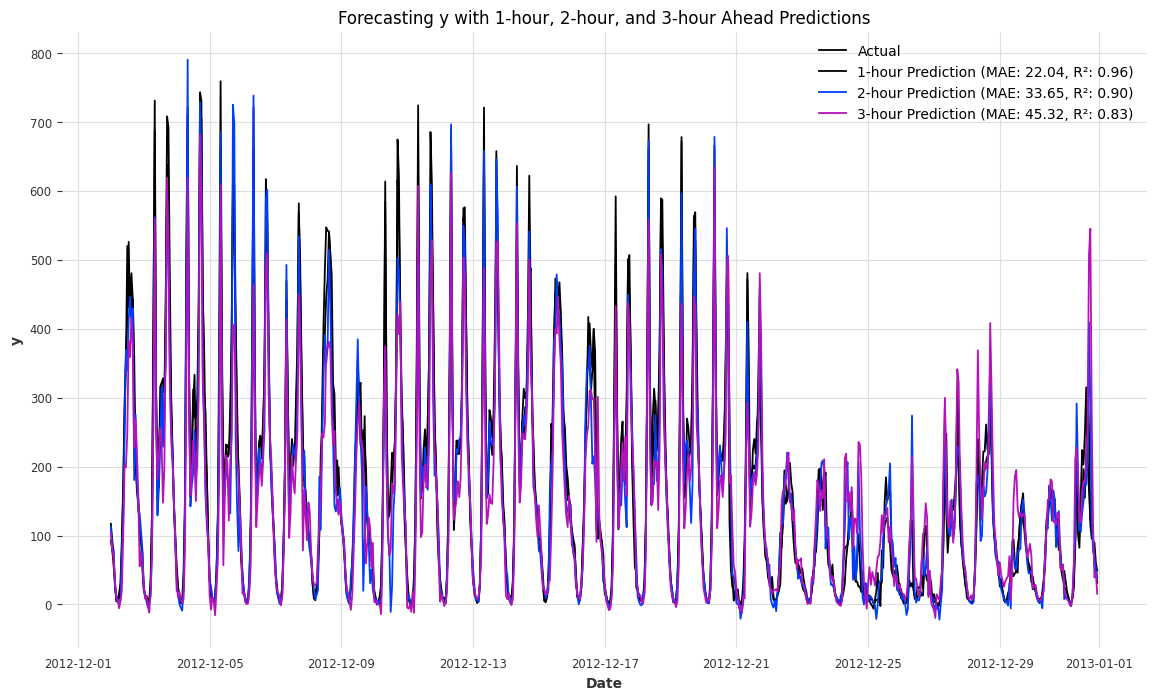

In [144]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Function to train and evaluate model for different horizons
def train_evaluate_model(df_train, df_test, horizon, lags_to_drop):
    # Drop specified lags for the given horizon
    features = df_train.drop(columns=['y'] + lags_to_drop).columns
    X_train = df_train[features]
    y_train = df_train['y']

    # Separate features and target for the test set
    X_test = df_test[features]
    y_test = df_test['y']

    # Initialize model and time series split
    model = XGBRegressor()
    tscv = TimeSeriesSplit(n_splits=5)
    predictions = []
    actuals = []

    # Perform time series split for training and validation
    for train_index, val_index in tscv.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Train the model
        model.fit(X_train_fold, y_train_fold)

        # Predict on the validation fold and collect predictions
        y_pred = model.predict(X_val_fold)
        predictions.extend(y_pred)
        actuals.extend(y_val_fold)

    # After cross-validation, train on the entire training data
    model.fit(X_train, y_train)

    # Make predictions on the holdout test set
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    print(f"{horizon}-hour prediction - MAE: {mae}, R²: {r2}")

    return model, y_test_pred, y_test, mae, r2

# Define lags to drop for each prediction horizon
lag_features_1_hour = []  # Use all lags for 1-hour prediction
lag_features_2_hour = [col for col in df.columns if '_1' in col]  # Drop 1-hour lags
lag_features_3_hour = [col for col in df.columns if '_1' in col or '_2' in col]  # Drop 1-hour and 2-hour lags

# Split the last two months as the test set
last_two_months = df.index[-1 * 30 * 24:]  # 2 months * 30 days * 24 hours
df_train = df.loc[df.index < last_two_months[0]]
df_test = df.loc[df.index >= last_two_months[0]]


# XGBoost Results
print("Training 1-hour ahead model with XGBoost:")
model_xgb_1_hour, predictions_xgb_1_hour, y_test_xgb_1_hour, mae_xgb_1_hour, r2_xgb_1_hour = train_evaluate_model(df_train, df_test, 1, lag_features_1_hour)

print("\nTraining 2-hour ahead model with XGBoost:")
model_xgb_2_hour, predictions_xgb_2_hour, y_test_xgb_2_hour, mae_xgb_2_hour, r2_xgb_2_hour = train_evaluate_model(df_train, df_test, 2, lag_features_2_hour)

print("\nTraining 3-hour ahead model with XGBoost:")
model_xgb_3_hour, predictions_xgb_3_hour, y_test_xgb_3_hour, mae_xgb_3_hour, r2_xgb_3_hour = train_evaluate_model(df_train, df_test, 3, lag_features_3_hour)


# Plotting the predictions for 1-hour, 2-hour, and 3-hour ahead models
plt.figure(figsize=(14, 8))
plt.plot(y_test_xgb_1_hour.index, y_test_xgb_1_hour, label="Actual", color="black")

plt.plot(y_test_xgb_1_hour.index, predictions_xgb_1_hour, label=f"1-hour Prediction (MAE: {mae_xgb_1_hour:.2f}, R²: {r2_xgb_1_hour:.2f})")
plt.plot(y_test_xgb_2_hour.index, predictions_xgb_2_hour, label=f"2-hour Prediction (MAE: {mae_xgb_2_hour:.2f}, R²: {r2_xgb_2_hour:.2f})")
plt.plot(y_test_xgb_3_hour.index, predictions_xgb_3_hour, label=f"3-hour Prediction (MAE: {mae_xgb_3_hour:.2f}, R²: {r2_xgb_3_hour:.2f})")

plt.title("Forecasting y with 1-hour, 2-hour, and 3-hour Ahead Predictions")
plt.xlabel("Date")
plt.ylabel("y")
plt.legend()
plt.show()


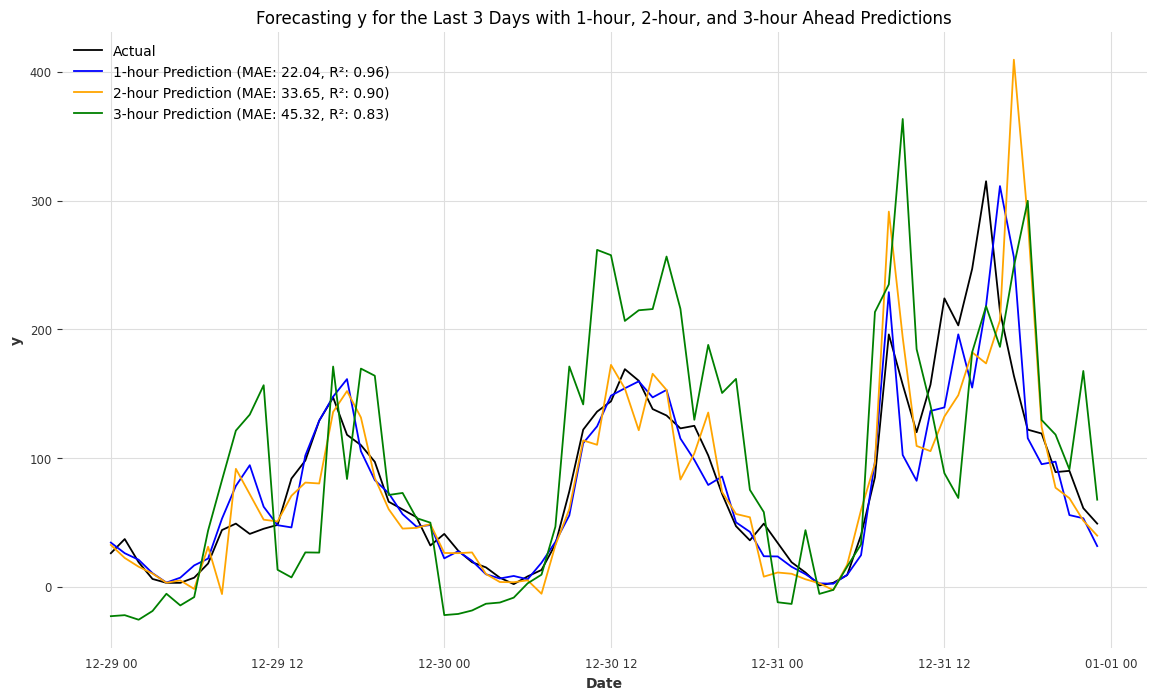

In [145]:
import matplotlib.pyplot as plt

# Extract the last 3 days (72 hours) from the test set and corresponding predictions
last_3_days = df_test.tail(3 * 24)  # 3 days * 24 hours
last_3_days_index = last_3_days.index

# Align predictions with the last 3 days
predictions_1_hour_last_3_days = predictions_1_hour[-72:]
predictions_2_hour_last_3_days = predictions_2_hour[-72:]
predictions_3_hour_last_3_days = predictions_3_hour[-72:]
y_test_last_3_days = last_3_days['y']

# Plotting the actual and predicted values for the last 3 days
plt.figure(figsize=(14, 8))
plt.plot(last_3_days_index, y_test_last_3_days, label="Actual", color="black")

plt.plot(last_3_days_index, predictions_1_hour_last_3_days, label=f"1-hour Prediction (MAE: {mae_xgb_1_hour:.2f}, R²: {r2_xgb_1_hour:.2f})", color="blue")
plt.plot(last_3_days_index, predictions_2_hour_last_3_days, label=f"2-hour Prediction (MAE: {mae_xgb_2_hour:.2f}, R²: {r2_xgb_2_hour:.2f})", color="orange")
plt.plot(last_3_days_index, predictions_3_hour_last_3_days, label=f"3-hour Prediction (MAE: {mae_xgb_3_hour:.2f}, R²: {r2_xgb_3_hour:.2f})", color="green")

plt.title("Forecasting y for the Last 3 Days with 1-hour, 2-hour, and 3-hour Ahead Predictions")
plt.xlabel("Date")
plt.ylabel("y")
plt.legend()
plt.show()


In [147]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import matplotlib.pyplot as plt

# Define a neural network model with three hidden layers
class TimeSeriesNN(nn.Module):
    def __init__(self, input_size):
        super(TimeSeriesNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Function to train and evaluate the NN model
def train_evaluate_nn(df_train, df_test, horizon, lags_to_drop):
    # Prepare the features and target
    features = df_train.drop(columns=['y'] + lags_to_drop).columns
    X_train = df_train[features].values
    y_train = df_train['y'].values
    X_test = df_test[features].values
    y_test = df_test['y'].values

    # Set up neural network, optimizer, and loss function
    input_size = X_train.shape[1]
    model = TimeSeriesNN(input_size=input_size)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    # Split the training data using TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=5)
    predictions = []
    actuals = []

    # TimeSeriesSplit for cross-validation
    for train_index, val_index in tscv.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Convert data to PyTorch tensors
        X_train_fold_tensor = torch.tensor(X_train_fold, dtype=torch.float32)
        y_train_fold_tensor = torch.tensor(y_train_fold, dtype=torch.float32).view(-1, 1)
        X_val_fold_tensor = torch.tensor(X_val_fold, dtype=torch.float32)

        # Train the model
        model.train()
        for epoch in range(100):  # Train for 100 epochs
            optimizer.zero_grad()
            y_pred_train = model(X_train_fold_tensor)
            loss = criterion(y_pred_train, y_train_fold_tensor)
            loss.backward()
            optimizer.step()

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_val = model(X_val_fold_tensor).squeeze().numpy()
            predictions.extend(y_pred_val)
            actuals.extend(y_val_fold)

    # Train the model on the full training set after cross-validation
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    for epoch in range(100):  # Train for 100 epochs
        optimizer.zero_grad()
        y_pred_train = model(X_train_tensor)
        loss = criterion(y_pred_train, y_train_tensor)
        loss.backward()
        optimizer.step()

    # Make predictions on the holdout test set
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test_tensor).squeeze().numpy()

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    print(f"{horizon}-hour prediction - MAE: {mae}, R²: {r2}")

    return model, y_test_pred, y_test, mae, r2

# Define the lags to drop for each prediction horizon
lag_features_1_hour = []  # Use all lags for 1-hour prediction
lag_features_2_hour = [col for col in df.columns if '_1' in col]  # Drop 1-hour lags
lag_features_3_hour = [col for col in df.columns if '_1' in col or '_2' in col]  # Drop 1-hour and 2-hour lags

# Split the last two months as the test set
last_two_months = df.index[-2 * 30 * 24:]  # 2 months * 30 days * 24 hours
df_train = df.loc[df.index < last_two_months[0]]
df_test = df.loc[df.index >= last_two_months[0]]

# Neural Network Results
print("\nTraining 1-hour ahead model with Neural Network:")
model_nn_1_hour, predictions_nn_1_hour, y_test_nn_1_hour, mae_nn_1_hour, r2_nn_1_hour = train_evaluate_nn(df_train, df_test, 1, lag_features_1_hour)

print("\nTraining 2-hour ahead model with Neural Network:")
model_nn_2_hour, predictions_nn_2_hour, y_test_nn_2_hour, mae_nn_2_hour, r2_nn_2_hour = train_evaluate_nn(df_train, df_test, 2, lag_features_2_hour)

print("\nTraining 3-hour ahead model with Neural Network:")
model_nn_3_hour, predictions_nn_3_hour, y_test_nn_3_hour, mae_nn_3_hour, r2_nn_3_hour = train_evaluate_nn(df_train, df_test, 3, lag_features_3_hour)




Training 1-hour ahead model with Neural Network:
1-hour prediction - MAE: 29.26161229281376, R²: 0.9337844437671043

Training 2-hour ahead model with Neural Network:
2-hour prediction - MAE: 46.01648381816016, R²: 0.8258360850983301

Training 3-hour ahead model with Neural Network:
3-hour prediction - MAE: 74.88726709038019, R²: 0.5792455602408434


In [150]:
# Naive Lag-Based Prediction Results
def calculate_naive_lag_metrics(df_test, lag_hours):
    lag_column = f"y_{lag_hours}"
    y_true = df_test['y']
    y_pred = df_test[lag_column]
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, r2

# Compile Results into a Comparison Table
results = {
    'Model': [],
    'Horizon': [],
    'MAE': [],
    'R²': []
}

# Adding XGBoost Results
results['Model'].extend(['XGBoost'] * 3)
results['Horizon'].extend(['1-hour', '2-hour', '3-hour'])
results['MAE'].extend([mae_xgb_1_hour, mae_xgb_2_hour, mae_xgb_3_hour])
results['R²'].extend([r2_xgb_1_hour, r2_xgb_2_hour, r2_xgb_3_hour])

# Adding Neural Network Results
results['Model'].extend(['Neural Network'] * 3)
results['Horizon'].extend(['1-hour', '2-hour', '3-hour'])
results['MAE'].extend([mae_nn_1_hour, mae_nn_2_hour, mae_nn_3_hour])
results['R²'].extend([r2_nn_1_hour, r2_nn_2_hour, r2_nn_3_hour])

# Adding Naive Lag Results
for lag in [1, 2, 3]:
    mae, r2 = calculate_naive_lag_metrics(df_test, lag)
    results['Model'].append('Naive Lag')
    results['Horizon'].append(f'{lag}-hour')
    results['MAE'].append(mae)
    results['R²'].append(r2)

# Create DataFrame for easy visualization
results_df = pd.DataFrame(results)
print("\nComparison of MAE and R² across Models and Horizons:")
print(results_df)


Comparison of MAE and R² across Models and Horizons:
            Model Horizon         MAE        R²
0         XGBoost  1-hour   22.042597  0.957843
1         XGBoost  2-hour   33.646223  0.898138
2         XGBoost  3-hour   45.315318  0.832354
3  Neural Network  1-hour   29.261612  0.933784
4  Neural Network  2-hour   46.016484  0.825836
5  Neural Network  3-hour   74.887267  0.579246
6       Naive Lag  1-hour   65.252083  0.646679
7       Naive Lag  2-hour  108.927778  0.104772
8       Naive Lag  3-hour  138.947917 -0.283496
